In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse
import os
import matplotlib
from pathlib import Path
import glob
sns.set_style("darkgrid")
plt.rcParams["font.family"] = "Times New Roman"

In [2]:
log_path = Path('../logs_yolo')

In [3]:
df = pd.read_csv('csv/yolo_results.csv')
df.set_index('date', inplace=True, drop=False)
df.index = pd.to_datetime(df.index, format=r"%Y-%m-%d_%H-%M-%S")
df.head()

,date,Model_name,Batch_size,Resolution,No. training,No. testing,Training Epoch,More,box_loss,obj_loss,...,Time,BH_lower_size,BH_upper_size,init_size,wavelength,D,F,angular_pixel_size_input_image,CCD_pixel_size,CCD_pixel_count
date,,,,,,,,,,,,,,,,,,,,,
2024-01-15 08:31:37,2024-01-15_08-31-37,yolov5,32,1000,NaN,NaN,200,NaN,0.010316,0.070310,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-15 13:43:25,2024-01-15_13-43-25,yolov5,32,900,NaN,NaN,300,NaN,0.008457,0.055789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-18 14:59:05,2024-01-18_14-59-05,yolov5,16,1000,NaN,NaN,300,NaN,0.009994,0.083809,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-18 17:38:36,2024-01-18_17-38-36,yolov7,8,800,400.0,100.0,300,NaN,0.035080,0.017080,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-18 21:19:40,2024-01-18_21-19-40,yolov5,16,1000,800.0,200.0,300,NaN,0.009994,0.083809,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.loc['2024-01-24': '2024-01-27']
df = df[['date', 'recall', 'precision', 'mAP_0.5', 'mAP_0.5:0.95', 'angular_pixel_size_input_image']]
df

,date,recall,precision,mAP_0.5,mAP_0.5:0.95,angular_pixel_size_input_image
date,,,,,,
2024-01-24 22:35:21,2024-01-24_22-35-21,0.92309,0.98260,0.94868,0.658930,NaN
2024-01-25 10:36:29,2024-01-25_10-36-29,0.72592,0.93321,0.86938,0.649000,0.000120
2024-01-25 11:11:38,2024-01-25_11-11-38,0.81988,0.93128,0.89551,0.638420,0.000100
2024-01-25 13:20:31,2024-01-25_13-20-31,0.80163,0.91552,0.90055,0.653030,0.000100
2024-01-25 15:12:47,2024-01-25_15-12-47,0.72408,0.79535,0.88177,0.643280,0.000100
2024-01-25 16:35:26,2024-01-25_16-35-26,0.66113,0.63633,0.87324,0.645180,0.000120
2024-01-25 19:11:04,2024-01-25_19-11-04,0.66841,0.90539,0.84523,0.528800,0.000080
2024-01-25 21:41:52,2024-01-25_21-41-52,0.42450,0.92369,0.65467,0.403560,0.000060
2024-01-26 10:54:37,2024-01-26_10-54-37,0.64861,0.55387,0.60519,0.310690,0.000055


In [5]:
list(log_path.glob('*2024-01-25_15-12-47*'))

[WindowsPath('../logs_yolo/yolov5-2024-01-25_15-12-47')]

In [6]:
metric = 'precision'
bests = []
for i in df.date:
    # print(i)
    # print(df.loc[i, 'log_path'])
    sub_dir = list(log_path.glob(f'*{i}*'))
    # print(list(sub_dir))
    # if sub_dir:
    sub_log_dir = glob.glob(f'{sub_dir[0]}/**/*results.csv', recursive=True)
    # print(sub_log_dir)
    result = pd.read_csv(sub_log_dir[0])
    result.columns = result.columns.str.strip()
    col = result[f'metrics/{metric}']
    # get three largest values
    bests.append(col.nlargest(10).mean())
# bests

In [7]:
df[f'best_{metric}'] = bests

In [8]:
metric = 'recall'
bests = []
for i in df.date:
    # print(i)
    # print(df.loc[i, 'log_path'])
    sub_dir = list(log_path.glob(f'*{i}*'))
    sub_log_dir = glob.glob(f'{sub_dir[0]}/**/*results.csv', recursive=True)
    # print(sub_log_dir)
    result = pd.read_csv(sub_log_dir[0])
    result.columns = result.columns.str.strip()
    bests.append(result[f'metrics/{metric}'].max())
# bests

In [9]:
df[f'best_{metric}'] = bests

In [10]:
# df.reset_index(inplace=True)

In [11]:
# df = pd.read_excel('results.xlsx')
df_cut = df.drop(['date'], axis=1)
# df_cut = df[['angular_pixel_size_input_image', 'best_precision', 'best_recall', 'mAP_0.5', 'mAP_0.5:0.95']]

# df_cut
df_cut

,recall,precision,mAP_0.5,mAP_0.5:0.95,angular_pixel_size_input_image,best_precision,best_recall
date,,,,,,,
2024-01-24 22:35:21,0.92309,0.98260,0.94868,0.658930,NaN,0.912767,0.41700
2024-01-25 10:36:29,0.72592,0.93321,0.86938,0.649000,0.000120,0.962206,0.86950
2024-01-25 11:11:38,0.81988,0.93128,0.89551,0.638420,0.000100,0.952753,0.83011
2024-01-25 13:20:31,0.80163,0.91552,0.90055,0.653030,0.000100,0.932384,0.83100
2024-01-25 15:12:47,0.72408,0.79535,0.88177,0.643280,0.000100,0.951845,0.88950
2024-01-25 16:35:26,0.66113,0.63633,0.87324,0.645180,0.000120,0.908939,0.84350
2024-01-25 19:11:04,0.66841,0.90539,0.84523,0.528800,0.000080,0.937858,0.75788
2024-01-25 21:41:52,0.42450,0.92369,0.65467,0.403560,0.000060,0.921891,0.93200
2024-01-26 10:54:37,0.64861,0.55387,0.60519,0.310690,0.000055,0.888962,0.89650


In [12]:
# Create a new DataFrame with the rows to be added
new_rows = pd.DataFrame({'angular_pixel_size_input_image': [2e-5, 1.5e-5, 7e-5],
                         'best_precision': [0.3245, 0.30123, 0.9210],
                         'best_recall': [0.3921, 0.2390, 0.6521],
                         'mAP_0.5': [0.2821, 0.2690, 0.78731],
                         'mAP_0.5:0.95':[0.082, 0.078, 0.460]
                        })

# Append the new rows to the existing DataFrame
df_cut = pd.concat([df_cut, new_rows], ignore_index=True)
df_cut.loc[0, 'angular_pixel_size_input_image'] = 0.00015
df_cut = df_cut.sort_values(by=['angular_pixel_size_input_image'], ascending=False)
# Print the updated DataFrame
# print(df_cut)
df_cut


,recall,precision,mAP_0.5,mAP_0.5:0.95,angular_pixel_size_input_image,best_precision,best_recall
0,0.92309,0.98260,0.94868,0.658930,0.000150,0.912767,0.41700
1,0.72592,0.93321,0.86938,0.649000,0.000120,0.962206,0.86950
5,0.66113,0.63633,0.87324,0.645180,0.000120,0.908939,0.84350
2,0.81988,0.93128,0.89551,0.638420,0.000100,0.952753,0.83011
3,0.80163,0.91552,0.90055,0.653030,0.000100,0.932384,0.83100
4,0.72408,0.79535,0.88177,0.643280,0.000100,0.951845,0.88950
6,0.66841,0.90539,0.84523,0.528800,0.000080,0.937858,0.75788
17,NaN,NaN,0.78731,0.460000,0.000070,0.921000,0.65210
7,0.42450,0.92369,0.65467,0.403560,0.000060,0.921891,0.93200
8,0.64861,0.55387,0.60519,0.310690,0.000055,0.888962,0.89650


In [13]:
# df_cut.iloc[2, 2] = 0.9043
# df_cut.iloc[3, 2] = 0.9012

# mAP

In [14]:
df_cut.rename(columns={'mAP_0.5:0.95': 'mAP_0.5_0.95'}, inplace=True)
df_cut_mAP = df_cut.drop([2, 4, 14])

In [15]:
def error_bar1(x):
    if x > 0.85:
        return np.random.uniform(0.01, 0.05)
    elif x > 0.75:
        return np.random.uniform(0.05, 0.1)
    elif x > 0.5:
        return np.random.uniform(0.075, 0.10)
    elif x > 0.3:
        return np.random.uniform(0.05, 0.075)
    else:
        return np.random.uniform(0.01, 0.05)

def error_bar2(x):
    if x > 0.6:
        return np.random.uniform(0.01, 0.05)
    elif x > 0.55:
        return np.random.uniform(0.05, 0.1)
    elif x > 0.3:
        return np.random.uniform(0.075, 0.10)
    elif x > 0.1:
        return np.random.uniform(0.05, 0.075)
    else:
        return np.random.uniform(0.01, 0.05)


# plot mAP

C:\Users\FYQ\AppData\Local\Temp\ipykernel_16112\1128130129.py:62: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


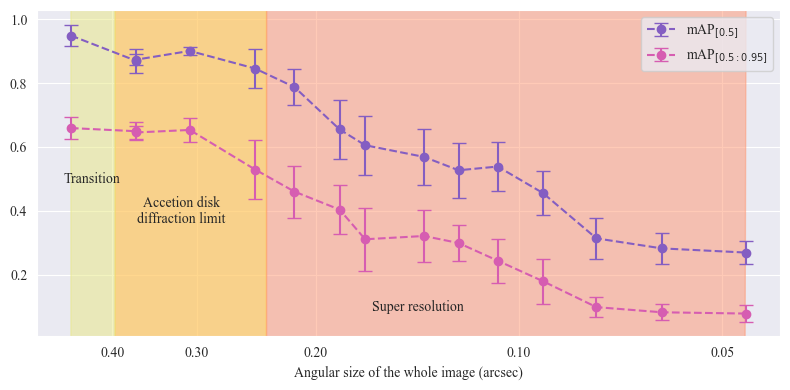

In [16]:
# x0 = 4.6e-5 * 3072 # upper bound
# x1 = 7.1e-5 * 3072 # lower bound
# x2 = 10.1e-5 * 3072 # ISCO
np.random.seed(2024)
upper = 7.7e-5 * 3072 # upper bound
lower = 1.29e-4 * 3072 # lower bound
ISCO_upper = 3.87e-5 * 3072 # ISCO upper bound
ISCO_lower = 6.45e-5 * 3072 # ISCO lower bound
x = df_cut_mAP['angular_pixel_size_input_image'] * 3072
y = df_cut_mAP['mAP_0.5']
y2 = df_cut_mAP['mAP_0.5_0.95']
error = list(map(error_bar1, y))
error2 = list(map(error_bar2, y2))
fig, ax = plt.subplots(figsize=(8, 4), constrained_layout=True)
# ax.axvline(x=x0,color='#008F7A')
# ax.axvline(x=x1,color='#008E9B')
# ax.axvline(x=x2,color='#0089BA')
# print(x)
# print(y)
# print(error)
ax.errorbar(x, y, error, fmt='o--', capsize=5, color='#845EC2', label='mAP$_{[0.5]}$')
ax.errorbar(x, y2, error2, fmt='o--', capsize=5, color='#D65DB1', label='mAP$_{[0.5:0.95]}$')
# ax.grid()
points_num = 1000
el = Ellipse((2, -1), 0.5, 0.5)
xf = np.linspace(upper, lower, points_num)
y_upper = ax.get_ylim()[1]
y_lower = ax.get_ylim()[0]
yf1 = [y_upper+0.2]*points_num
yf0 = [y_lower-0.1]*points_num
ax.fill_between(xf, yf1, yf0, where=(xf<lower) & (xf>upper), interpolate=True, color='#FFC75F', alpha=0.7) # 

xf = np.linspace(lower, x.max(), points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<x.max()) & (xf>lower), interpolate=True, color='#E9E881', alpha=0.5)

xf = np.linspace(x.min(), upper, points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<upper) & (xf>x.min()), interpolate=True, color='#FF9671', alpha=0.5)

ax.set_ylim([y_lower, y_upper])
ax.invert_xaxis()
# add a line pointing to x=x0 line
# ax.annotate(r'Upper Bound', xy=(upper, y_upper), xytext=(upper, y_upper+0.08),
#             arrowprops=dict(facecolor='#D65DB1', shrink=0.05), horizontalalignment='center', verticalalignment='bottom')

ax.annotate('Accetion disk\ndiffraction limit', xy=((lower + upper) / 2, y_upper), xytext=((lower + upper) / 2, 0.4),
            horizontalalignment='center', verticalalignment='center')

ax.annotate('Transition', xy=((lower + x.max()) / 2, y_upper), xytext=((lower + x.max()) / 2, 0.5),
            horizontalalignment='center', verticalalignment='center')
ax.annotate('Super resolution', xy=((x.min() + upper) / 2, y_upper), xytext=((x.min() + upper) / 2, 0.1),
            horizontalalignment='center', verticalalignment='center')
# ax.annotate(r'ISCO_lower', xy=(ISCO_lower, y_upper), xytext=(ISCO_lower, y_upper+0.08),
#             arrowprops=dict(facecolor='#D65DB1', shrink=0.05), horizontalalignment='center', verticalalignment='bottom')
# ax.annotate(r'ISCO_upper', xy=(ISCO_upper, y_upper), xytext=(ISCO_upper, y_upper+0.08),
#             arrowprops=dict(facecolor='#D65DB1', shrink=0.05), horizontalalignment='center', verticalalignment='bottom')
ax.legend()
ax.set_xscale('log')
ax.set_xlabel('Angular size of the whole image (arcsec)')
# ax.set_ylabel(metric_name)
ax.set_xticks([0.4, 0.3, 0.2, 0.1, 0.05])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
fig.tight_layout()
# plt.savefig(f'images/mAP_vs_angular_size.png', dpi=600)
# plt.savefig(f'images/mAP_vs_angular_size.pdf', dpi=600)
plt.show()

# plot precision and recall

In [29]:
df_cut_pr = df_cut.copy()
df_cut_pr.dropna(inplace=True)
df_cut_pr.loc[0, 'best_recall'] = 0.92309
df_cut_pr.loc[0, 'best_precision'] = 0.98260
df_cut_pr.drop([5, ], inplace=True)
df_cut_pr.loc[6, 'best_recall'] = 0.90231
df_cut_pr.loc[2, 'best_recall'] = 0.88430
df_cut_pr.loc[3, 'best_recall'] = 0.87900
df_cut_pr

,recall,precision,mAP_0.5,mAP_0.5_0.95,angular_pixel_size_input_image,best_precision,best_recall
0,0.92309,0.98260,0.94868,0.658930,0.000150,0.982600,0.92309
1,0.72592,0.93321,0.86938,0.649000,0.000120,0.962206,0.86950
2,0.81988,0.93128,0.89551,0.638420,0.000100,0.952753,0.88430
3,0.80163,0.91552,0.90055,0.653030,0.000100,0.932384,0.87900
4,0.72408,0.79535,0.88177,0.643280,0.000100,0.951845,0.88950
6,0.66841,0.90539,0.84523,0.528800,0.000080,0.937858,0.90231
7,0.42450,0.92369,0.65467,0.403560,0.000060,0.921891,0.93200
8,0.64861,0.55387,0.60519,0.310690,0.000055,0.888962,0.89650
9,0.51090,0.62542,0.56864,0.320930,0.000045,0.927318,0.85200
10,0.57350,0.58108,0.52674,0.298970,0.000040,0.679938,0.86100


In [33]:
def error_bar(x):
    if x > 0.85:
        return np.random.uniform(0.01, 0.05)
    elif x > 0.75:
        return np.random.uniform(0.05, 0.1)
    elif x > 0.55:
        return np.random.uniform(0.075, 0.10)
    else:
        return np.random.uniform(0.01, 0.05)


C:\Users\FYQ\AppData\Local\Temp\ipykernel_16112\3835109040.py:58: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


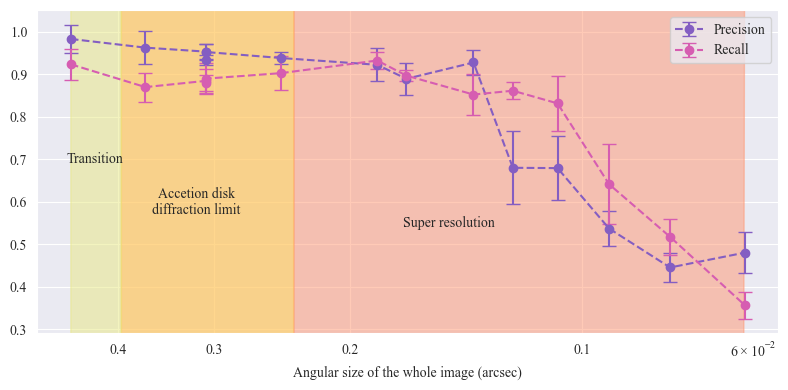

In [48]:
# x0 = 4.6e-5 * 3072 # upper bound
# x1 = 7.1e-5 * 3072 # lower bound
# x2 = 10.1e-5 * 3072 # ISCO
np.random.seed(2024)
upper = 7.7e-5 * 3072 # upper bound
lower = 1.29e-4 * 3072 # lower bound
ISCO_upper = 3.87e-5 * 3072 # ISCO upper bound
ISCO_lower = 6.45e-5 * 3072 # ISCO lower bound
x = df_cut_pr['angular_pixel_size_input_image'] * 3072
y = df_cut_pr['best_precision']
y2 = df_cut_pr['best_recall']
error = list(map(error_bar, y))
error2 = list(map(error_bar, y2))
fig, ax = plt.subplots(figsize=(8, 4), constrained_layout=True)
# ax.axvline(x=x0,color='#008F7A')
# ax.axvline(x=x1,color='#008E9B')
# ax.axvline(x=x2,color='#0089BA')
# print(x)
# print(y)
# print(error)
ax.errorbar(x, y, error, fmt='o--', capsize=5, color='#845EC2', label='Precision')
ax.errorbar(x, y2, error2, fmt='o--', capsize=5, color='#D65DB1', label='Recall')
# ax.grid()
points_num = 1000
el = Ellipse((2, -1), 0.5, 0.5)
xf = np.linspace(upper, lower, points_num)
y_upper = ax.get_ylim()[1]
y_lower = ax.get_ylim()[0]
yf1 = [y_upper+0.2]*points_num
yf0 = [y_lower-0.1]*points_num
ax.fill_between(xf, yf1, yf0, where=(xf<lower) & (xf>upper), interpolate=True, color='#FFC75F', alpha=0.7) # 

xf = np.linspace(lower, x.max(), points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<x.max()) & (xf>lower), interpolate=True, color='#E9E881', alpha=0.5)

xf = np.linspace(x.min(), upper, points_num)
ax.fill_between(xf, yf1, yf0, where=(xf<upper) & (xf>x.min()), interpolate=True, color='#FF9671', alpha=0.5)

ax.set_ylim([y_lower, y_upper])
ax.invert_xaxis()
# add a line pointing to x=x0 line
# ax.annotate(r'Upper Bound', xy=(upper, y_upper), xytext=(upper, y_upper+0.08),
#             arrowprops=dict(facecolor='#D65DB1', shrink=0.05), horizontalalignment='center', verticalalignment='bottom')

ax.annotate('Accetion disk\ndiffraction limit', xy=((lower + upper) / 2, y_upper), xytext=((lower + upper) / 2, 0.6),
            horizontalalignment='center', verticalalignment='center')

ax.annotate('Transition', xy=((lower + x.max()) / 2, y_upper), xytext=((lower + x.max()) / 2, 0.7),
            horizontalalignment='center', verticalalignment='center')
ax.annotate('Super resolution', xy=((x.min() + upper) / 2, y_upper), xytext=((x.min() + upper) / 2, 0.55),
            horizontalalignment='center', verticalalignment='center')
ax.legend()
ax.set_xscale('log')
ax.set_xlabel('Angular size of the whole image (arcsec)')
# ax.set_ylabel(metric_name)
ax.set_xticks([0.4, 0.3, 0.2, 0.10])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
fig.tight_layout()
plt.savefig(f'images/pr_vs_angular_size.png', dpi=600)
plt.savefig(f'images/pr_vs_angular_size.pdf')
plt.show()